In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from dataclasses import dataclass

In [4]:
@dataclass
class Item:
    valor: int
    peso: int
    is_otimo: bool

    @property
    def custo_beneficio(self):
        return self.valor / self.peso

sizes = [100, 200, 500, 1000, 2000, 5000, 10000]

BeneficioMaximo = int

Capacidade = int


def get_data(cat: int, size: int) -> tuple[BeneficioMaximo, Capacidade, list[Item]]:
    path = "dataset/{}/knapPI_{}_{}_1000_1"

    with open(path.format("large_scale", cat, size), "r") as f:
        get_line_values = lambda: list(map(int, f.readline().split()))
        # Pega o resultado ótimo
        with open(path.format("large_scale-optimum", cat, size), "r") as g:
            beneficio_maximo = int(g.read())

        # Primeira Linha: número de itens `n`e capacidade da mochila
        n, capacidade = get_line_values()

        # Próximas `n`linhas: valor e peso de cada item
        valores, pesos = [list(i) for i in zip(*[get_line_values() for _ in range(n)])]

        # Última linha: vetor de booleanos indicando quais itens compõe uma solução ótima
        solucoes_otimas = get_line_values()

        itens = [
            Item(v, p, bool(otimo))
            for v, p, otimo in zip(valores, pesos, solucoes_otimas)
        ]

    return beneficio_maximo, capacidade, itens


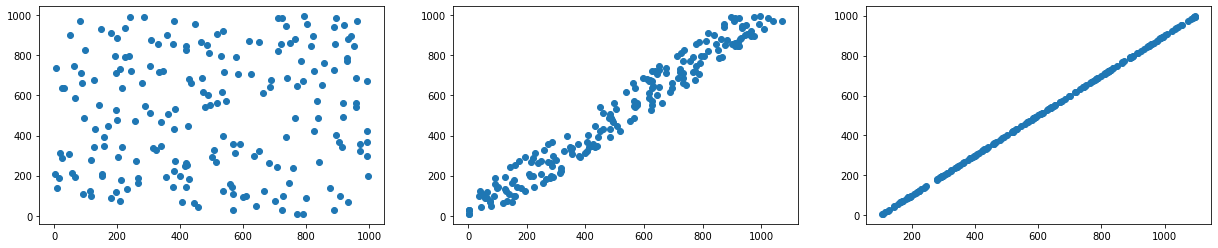

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(21, 4))

for cat in [1, 2, 3]:
    itens = get_data(cat, sizes[1])[2]
    
    valores = [i.valor for i in itens]
    pesos = [i.peso for i in itens]
    
    ax[cat - 1].scatter(valores, pesos)

### Abordagem Gulosa

##### Priorizando o número de items a serem inseridos

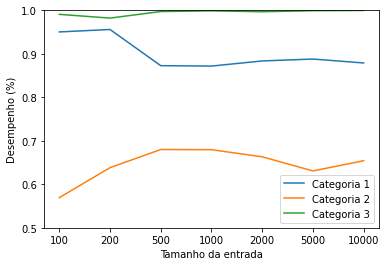

In [50]:
# fig, ax = plt.subplots(1, 3, figsize=(21, 4))
fig, ax = plt.subplots()

for cat in [1, 2, 3]:
    desempenho = []
    for size in sizes:
        beneficio_maximo, capacidade, itens = get_data(cat, size)

        v, w = 0, 0

        # for i, item in df.sort_values(by="peso").iterrows():
        for item in sorted(itens, key=lambda i: i.peso):
            if (w + item.peso) > capacidade:
                break
            w += item.peso
            v += item.valor

        desempenho.append(v / beneficio_maximo)

    # cv = ax[cat - 1]
    # cv.bar([*map(str, sizes)], desempenho)
    # cv.set_title(f"Categoria {cat}")
    # cv.set_ylim(0.5, 1)
    
    ax.plot([*map(str, sizes)], desempenho, label=f"Categoria {cat}")

plt.ylim(0.5, 1)
plt.ylabel("Desempenho (%)")
plt.xlabel("Tamanho da entrada")
plt.legend()
plt.show()


##### Priorizando os itens de melhor relação de benefício/custo

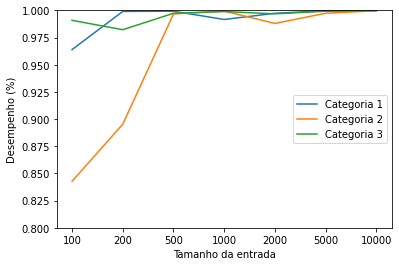

In [49]:
# fig, ax = plt.subplots(1, 3, figsize=(21, 4))
fig, ax = plt.subplots()

for cat in [1, 2, 3]:
    desempenho = []
    for size in sizes:
        beneficio_maximo, capacidade, itens = get_data(cat, size)

        v = 0
        w = 0
        # for i, item in df.sort_values(by="custoBeneficio", ascending=False).iterrows():
        for item in sorted(itens, key=lambda i: i.valor/i.peso , reverse= True):
            if (w + item.peso) > capacidade:
                break
            w += item.peso
            v += item.valor

        desempenho.append(v / beneficio_maximo)

    # cv = ax[cat - 1]
    # cv.bar([*map(str, sizes)], desempenho)

    # cv.set_ylim(0.8, 1)
    # cv.set_title(f"Categoria {cat}")
    cv = ax
    cv.plot([*map(str, sizes)], desempenho, label=f"Categoria {cat}")
    cv.set_ylim(0.8, 1)

plt.ylabel("Desempenho (%)")
plt.xlabel("Tamanho da entrada")
plt.legend(loc="center right")
plt.show()


### Abordagem por Programação Dinâmica

In [26]:
beneficio_maximo, W, itens = get_data(1, sizes[4])

# array que guarda os resultados ótimos para mochilas de capacidade indo de 0 a W
mochilas = [0 for _ in range(W + 1)]

for item in itens:
    # index do peso das mochilas anteriores que cabem na mochila
    w_validos = [w for w in range(W) if item.peso + w <= W]

    for w in w_validos:
        mochilas[w] = max(mochilas[w], mochilas[w + item.peso] + item.valor)


110625 110625
